Customer Churn Prediction Project

Aim of the project:
- Use ensemble modelling to create the best model possible with only machine learning

1. Problem statement\
Our goal is to predict behavior to retain customers\
We can analyze all relevant customer data and develop focused customer retention programs

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

2. Data collection

- Dataset Source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
telco_df = pd.read_csv("..\\content\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
telco_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


2.2 Dataset information


In [4]:
# Display the titles of the columns
telco_df.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
telco_df.shape

(7043, 21)

3. Data Checks

3.1 Check Missing values

In [6]:
# Look for missing values
telco_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

3.2 Check Duplicates

In [7]:
telco_df.duplicated().sum()

0

In [8]:
telco_df.loc[telco_df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


3.3 Check data types

In [9]:
# Infos about the dataset
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are 1 int feature, 2 float features and 18 string features\
TotalCharges is not suppose to be a string object so we sill take care of it


3.4 Checking the number of unique values of each column

In [10]:
telco_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

3.5 Check statistics of data set

In [11]:
# I want to show the most extreme pourcentiles to display the extreme values that can be either very informatives of very annoying
pourcentiles = [.25, .50, .75, .95, .99]
telco_df.describe(percentiles=pourcentiles)

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
95%,1.000000,72.000000,107.400000
99%,1.000000,72.000000,114.729000
max,1.000000,72.000000,118.750000


In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in telco_df.columns if telco_df[feature].dtype != 'O']
categorical_features = [feature for feature in telco_df.columns if telco_df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))
    

We have 3 numerical features : ['SeniorCitizen', 'tenure', 'MonthlyCharges']

We have 18 categorical features : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


3.6 Check for uniformity in the object colummns

In [13]:
obj_columns = telco_df.select_dtypes(exclude=np.number).columns

for column in obj_columns:
    print(f'{telco_df[column].value_counts()}\n')

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection
No                     3095
Yes      

In [14]:
telco_df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

The data is imbalanced as only 27% of the customers have churned

<Axes: >

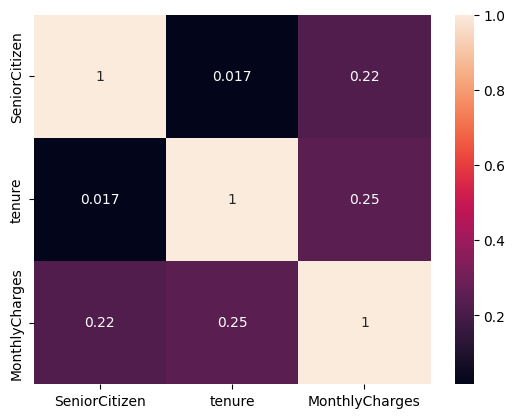

In [15]:
int_columns = telco_df.select_dtypes(include=np.number).columns

sns.heatmap(telco_df[int_columns].corr(), annot=True)

3.7 Demographic analysis

In [16]:
# Import plotly libs
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import nbformat

In [17]:
demo_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig = make_subplots(rows=2, cols=2, subplot_titles=demo_cols)

for idx, col in enumerate(demo_cols):
    temp = telco_df.groupby(col, as_index=False)['customerID'].count()
    temp.columns = [col, 'Count']
    
    bar_fig = px.bar(temp,
                     x=col,
                     y='Count',
                     text_auto='.2s',
                     width=800,
                     height=600)
    
    # Get the trace from the created bar figure and add it to the subplot
    for trace in bar_fig['data']:
        fig.add_trace(trace, row=(idx // 2) + 1, col=(idx % 2) + 1)

fig.update_layout(height=800, width=1200, title_text="Bar Charts for Demographic Columns")
fig.show()

Observations:
- Most of the customers in this dataset are younger and independant people
- There is a relatively equal distribution of user gender and marital status

What is the relationship between the cost and the customer churn if there is one

In [18]:
fig = px.box(telco_df,
            x = 'Churn',
            y = 'MonthlyCharges',
            color = 'Churn',
            width=800,
            height=600)
fig.show()

This plot is showing us that the customer churning pay a greater median subscription

In [19]:
import random

cat_cols = ['InternetService',"TechSupport","OnlineBackup","Contract"]
fig = make_subplots(rows=2, cols=2, subplot_titles=cat_cols)

def random_color():
    return "rgba({}, {}, {}, 0.8)".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))


for idx, col in enumerate(cat_cols):
    temp = telco_df.groupby(['Churn',col], as_index=False)['customerID'].count()
    temp.columns = ['Churn', col, 'Count']
    bar_fig = px.bar(temp,
                x='Churn',
                y='Count',
                barmode='group',
                text_auto='.2s',
                color=col,
                title=col)
    
    # Get the trace from the created bar figure and add it to the subplot
    for trace in bar_fig['data']:
        trace.showlegend = False  # Hide the legend for individual traces
        fig.add_trace(trace, row=(idx // 2) + 1, col=(idx % 2) + 1)

fig.update_layout(height=800, width=1200)
fig.show()

We have to take care of the Total_Charges category

In [20]:
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')
# Check the datatype
telco_df['TotalCharges'].dtypes

dtype('float64')

In [21]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Let's encode the categorical features

In [22]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()


In [23]:
cat_features = telco_df.drop(['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure'],axis=1)

In [24]:
cat_features.tail()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
7042,Male,No,No,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),No


In [25]:
cat_df = cat_features.apply(label_encoding.fit_transform)
cat_df.tail()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1
7042,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0


In [26]:
# Merge the encoded dataset and the main dataset

num_features = telco_df[['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure']]
dataset = pd.merge(num_features, cat_df, left_index=True, right_index=True)
dataset.head()

,customerID,TotalCharges,MonthlyCharges,SeniorCitizen,tenure,gender,Partner,Dependents,PhoneService,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,29.85,29.85,0,1,0,1,0,0,1,...,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,1889.50,56.95,0,34,1,0,0,1,0,...,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,108.15,53.85,0,2,1,0,0,1,0,...,2,2,0,0,0,0,0,1,3,1
3,7795-CFOCW,1840.75,42.30,0,45,1,0,0,0,1,...,2,0,2,2,0,0,1,0,0,0
4,9237-HQITU,151.65,70.70,0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2,1


In [27]:
dataset

,customerID,TotalCharges,MonthlyCharges,SeniorCitizen,tenure,gender,Partner,Dependents,PhoneService,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,29.85,29.85,0,1,0,1,0,0,1,...,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,1889.50,56.95,0,34,1,0,0,1,0,...,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,108.15,53.85,0,2,1,0,0,1,0,...,2,2,0,0,0,0,0,1,3,1
3,7795-CFOCW,1840.75,42.30,0,45,1,0,0,0,1,...,2,0,2,2,0,0,1,0,0,0
4,9237-HQITU,151.65,70.70,0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1990.50,84.80,0,24,1,1,1,1,2,...,2,0,2,2,2,2,1,1,3,0
7039,2234-XADUH,7362.90,103.20,0,72,0,1,1,1,2,...,0,2,2,0,2,2,1,1,1,0
7040,4801-JZAZL,346.45,29.60,0,11,0,1,1,0,1,...,2,0,0,0,0,0,0,1,2,0
7041,8361-LTMKD,306.60,74.40,1,4,1,1,0,1,2,...,0,0,0,0,0,0,0,1,3,1


In [28]:
clean_dataset = dataset.to_csv("..\\content\\clean_dataset.csv", index=False)

We saw earlier an imbalance in the churn label\
We will solve this problem using oversampling

We will create the splitted data first

In [29]:
# Drop the user ID because the model won't learn anything from it
dataset = dataset.dropna()
dataset = dataset.drop(["customerID"], axis=1)

In [30]:
dataset.shape

(7032, 20)

In [31]:
X = dataset.drop(['Churn'],axis=1)
y = dataset['Churn']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train.shape, X_test.shape

((5625, 19), (1407, 19))

Add the oversampling to the dataset

In [34]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE(k_neighbors=5)
X_smote, y_smote = oversampling.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

In [35]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

The distribution of the samples are equal !

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

In [37]:

from sklearn.metrics import accuracy_score
preds = rf.predict(X_test)
print(accuracy_score(preds,y_test))

0.7867803837953091
